<a href="https://colab.research.google.com/github/AndrewCrossman/Graduate_Research/blob/main/G_g_p_p0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
import csv
import math
import numpy as np
from astropy.coordinates import cartesian_to_spherical
import pandas as pd
import scipy as sp
from sklearn.neighbors import KDTree
from scipy import optimize
from google.colab import files
from collections import Counter
import matplotlib.pylab as plt
%pylab inline

Populating the interactive namespace from numpy and matplotlib


/usr/local/lib/python3.10/dist-packages/IPython/core/magics/pylab.py:159: UserWarning: pylab import has clobbered these variables: ['plt']
`%matplotlib` prevents importing * from pylab and numpy
  warn("pylab import has clobbered these variables: %s"  % clobbered +


# RMC Cooling Schedules

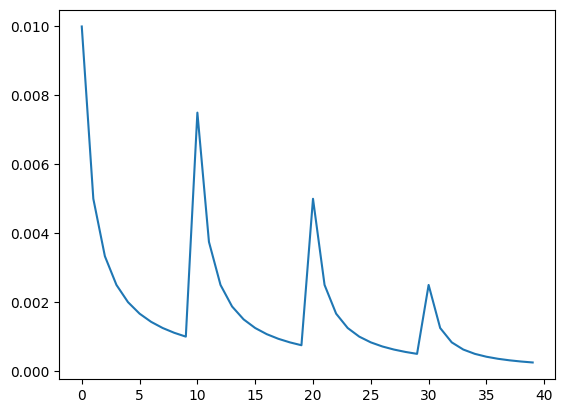

In [ ]:
# CHecks whether the sigams in RMC code are acting as thought
loop1 = 4
loop2 = 10
beta = 1
sig_0 = 0.01
sigmas = []
for i in np.arange(1,loop1+1,1):
  sig_1 = sig_0*(loop1-i+1)/loop1
  for j in np.arange(1,loop2+1,1):
    sig_2 = sig_1/(j*beta)
    sigmas.append(sig_2)
plt.plot(sigmas)

# FCC Nearest Neighbors

In [ ]:
###############################################################################
# Data taken from a r=75A Au FCC Sphere
###############################################################################
NN_distance = [np.sqrt(1/2), np.sqrt(2/2), np.sqrt(3/2), np.sqrt(4/2), np.sqrt(5/2), np.sqrt(6/2), np.sqrt(7/2), np.sqrt(8/2), np.sqrt(9/2), np.sqrt(10/2),
            np.sqrt(11/2), np.sqrt(12/2), np.sqrt(13/2), np.sqrt(14/2), np.sqrt(15/2), np.sqrt(16/2), np.sqrt(17/2), np.sqrt(18/2), np.sqrt(19/2), np.sqrt(20/2),
            np.sqrt(21/2), np.sqrt(22/2), np.sqrt(23/2), np.sqrt(24/2), np.sqrt(25/2), np.sqrt(26/2), np.sqrt(27/2)]
NN_count = [12, 6, 24, 12, 24, 8, 48, 6, 36, 24,
         24, 24, 72, 0, 48, 12, 48, 30, 72, 24,
         48, 24, 48, 8, 84, 24, 96]

# G(r) and all its Associates

In [5]:
file = "https://raw.githubusercontent.com/AndrewCrossman/Graduate_Research/main/Control/STRs/Sphere100_Au_onAu_voidless.stru"
lp = 4.0789   # lattice paramter
N = 3925      # number of atoms

In [6]:
data = pd.read_csv(file, skiprows=3)
data = data.drop(data.columns[3:], axis=1)
data[["atoms", "x"]] = data[data.columns[0]].str.split(expand=True)
data = data.drop(data.columns[0], axis=1)
data = data.set_axis(["y", "z", "atom", "x"], axis=1, inplace=False)
data["x"] = data["x"].astype(float)*lp
data["y"] = data["y"].astype(float)*lp
data["z"] = data["z"].astype(float)*lp
atom = data.atom
data = data.drop(data.columns[2], axis=1)
data

<ipython-input-6-c6a31c8fcca2>:5: FutureWarning: DataFrame.set_axis 'inplace' keyword is deprecated and will be removed in a future version. Use `obj = obj.set_axis(..., copy=False)` instead
  data = data.set_axis(["y", "z", "atom", "x"], axis=1, inplace=False)


,y,z,x
0,-10.19725,-22.43395,-4.07890
1,-10.19725,-22.43395,0.00000
2,-10.19725,-22.43395,4.07890
3,-6.11835,-22.43395,-8.15780
4,-8.15780,-22.43395,-6.11835
...,...,...,...
3920,2.03945,24.47340,-2.03945
3921,0.00000,24.47340,0.00000
3922,2.03945,24.47340,2.03945
3923,0.00000,24.47340,4.07890


In [7]:
data_ar = data.to_numpy()
tree = KDTree(data_ar, leaf_size=2)
distances, ind = tree.query(data_ar, k=N-1)

distances = np.round(distances.flatten(),4)

## Calculating $\rho(r)$: number density of atoms

In [27]:
rho_0 = .01407 #.05894 # for FCC Au with lp = 4.0789 \AA
const = 1/(4*np.pi*N)

In [28]:
c = Counter(distances)
c

Counter({0.0: 3925,
         2.8842: 43056,
         4.0789: 20664,
         4.9956: 80112,
         5.7684: 39060,
         6.4493: 76176,
         7.0649: 24816,
         7.6309: 145920,
         8.1578: 17826,
         8.6527: 105144,
         9.1207: 68880,
         9.5659: 67632,
         9.9912: 66408,
         10.3992: 196368,
         11.1705: 126720,
         11.5369: 31188,
         11.8919: 122784,
         12.2367: 75660,
         12.572: 178560,
         12.8986: 58872,
         13.2171: 115872,
         13.5282: 57120,
         13.8322: 112704,
         14.1297: 18472,
         14.4211: 191760,
         14.7067: 54192,
         14.9868: 213312,
         15.2618: 105168,
         15.532: 52032,
         16.0586: 202368,
         16.3156: 12558,
         16.5686: 197184,
         16.8177: 97392,
         17.0633: 96096,
         17.3053: 71268,
         17.544: 234672,
         17.7795: 46320,
         18.0119: 91392,
         18.2414: 45288,
         18.468: 89328,
       

In [29]:
rho_r = {}
for key in c:
  print(key,c[key])
  rho_r[key] = c[key]*const*(1/(key*key))

0.0 3925
2.8842 43056
4.0789 20664
4.9956 80112
5.7684 39060
6.4493 76176
7.0649 24816
7.6309 145920
8.1578 17826
8.6527 105144
9.1207 68880
9.5659 67632
9.9912 66408
10.3992 196368
11.1705 126720
11.5369 31188
11.8919 122784
12.2367 75660
12.572 178560
12.8986 58872
13.2171 115872
13.5282 57120
13.8322 112704
14.1297 18472
14.4211 191760
14.7067 54192
14.9868 213312
15.2618 105168
15.532 52032
16.0586 202368
16.3156 12558
16.5686 197184
16.8177 97392
17.0633 96096
17.3053 71268
17.544 234672
17.7795 46320
18.0119 91392
18.2414 45288
18.468 89328
18.6919 88128
18.9131 217968
19.1317 42936
19.3479 212592
19.7732 165792
19.9824 41064
20.1895 182568
20.3945 50112
20.5974 79056
20.7984 117528
20.9974 115824
21.1946 50912
21.3899 226368
21.7754 147168
21.9655 109152
22.1541 107952
22.3411 71088
22.5265 175392
22.8928 206208
23.0737 16956
23.2533 67056
23.4315 66240
23.6083 229248
23.7839 64656
23.9581 127776
24.1311 63360
24.3029 62496
24.4734 38466
24.6428 243888
24.811 30192
24.9781 14884

<ipython-input-29-69033abfb058>:4: RuntimeWarning: divide by zero encountered in double_scalars
  rho_r[key] = c[key]*const*(1/(key*key))


In [30]:
rho_r

{0.0: inf,
 2.8842: 0.10493815162544898,
 4.0789: 0.025181335066689115,
 4.9956: 0.06508377500990856,
 5.7684: 0.02379972711404936,
 6.4493: 0.037131584351179615,
 7.0649: 0.010080224797192805,
 7.6309: 0.050805855797527305,
 8.1578: 0.005430730726127567,
 8.6527: 0.028472898300542584,
 9.1207: 0.016787548146537094,
 9.5659: 0.014984802810800179,
 9.9912: 0.01348762773010912,
 10.3992: 0.03681470546606941,
 11.1705: 0.02058971870405006,
 11.5369: 0.004750723384570101,
 11.8919: 0.01760312428830587,
 12.2367: 0.010244439127337388,
 12.572: 0.022904768540694766,
 12.8986: 0.0071742104925522675,
 13.2171: 0.013447966739564814,
 13.5282: 0.006327885951912034,
 13.8322: 0.011942830959532929,
 14.1297: 0.0018758517496105954,
 14.4211: 0.01869440810136651,
 14.7067: 0.005079900284351514,
 14.9868: 0.0192551958021459,
 15.2618: 0.009154245892465652,
 15.532: 0.0043728666191242,
 16.0586: 0.015910248155612053,
 16.3156: 0.0009564556891438066,
 16.5686: 0.014562988969969777,
 16.8177: 0.00698136

Text(0.5, 0, '$r(\\AA)$')

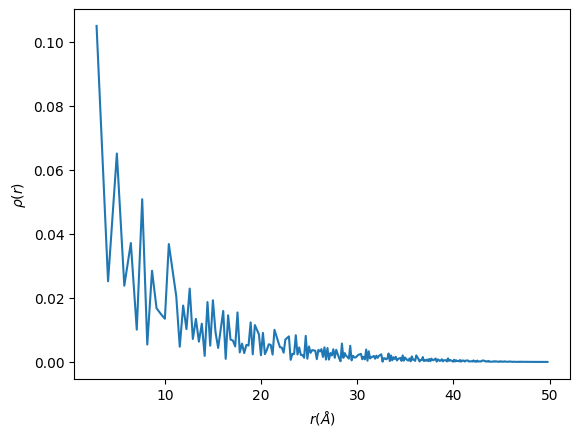

In [31]:
plt.plot(rho_r.keys(), rho_r.values())
plt.ylabel(r'$\rho(r)$')
plt.xlabel(r'$r(\AA)$')

In [32]:
g_r = {}
for key in rho_r:
  g_r[key] = rho_r[key]/rho_0

Text(0.5, 0, '$r(\\AA)$')

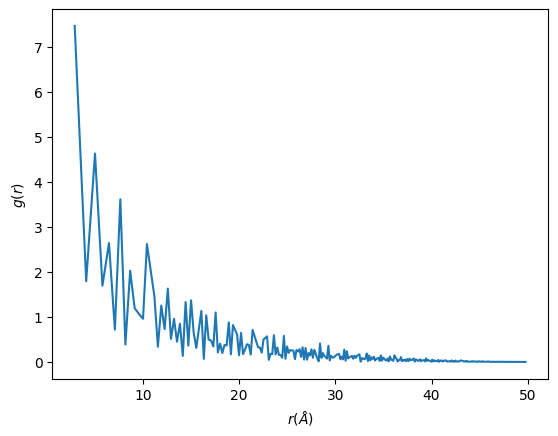

In [33]:
plt.plot(g_r.keys(), g_r.values())
plt.ylabel(r'$g(r)$')
plt.xlabel(r'$r(\AA)$')

In [58]:
G_r = {}
for key in rho_r:
  G_r[key] = 4*np.pi*key*(rho_r[key]-rho_0)

<ipython-input-58-b971a060ed85>:3: RuntimeWarning: invalid value encountered in double_scalars
  G_r[key] = 4*np.pi*key*(rho_r[key]-rho_0)


Text(0.5, 0, '$r(\\AA)$')

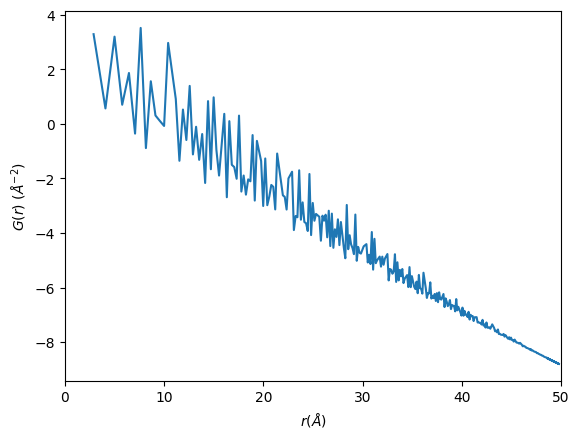

In [59]:
plt.plot(G_r.keys(), G_r.values())
plt.xlim(0,50)
plt.ylabel(r'$G(r)$ $(\AA^{-2})$')
plt.xlabel(r'$r(\AA)$')